In [ ]:
from google.colab import files
uploaded =files.upload()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
df=pd.read_excel("hotel_reviews (1).xlsx")
df

Review  Rating
0      nice hotel expensive parking got good deal sta...     4.0
1      ok nothing special charge diamond member hilto...     2.0
2      nice rooms not 4* experience hotel monaco seat...     3.0
3      unique, great stay, wonderful time hotel monac...     5.0
4      great stay great stay, went seahawk game aweso...     5.0
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...     5.0
20487  great location price view hotel great quick pl...     4.0
20488  ok just looks nice modern outside, desk staff ...     2.0
20489  hotel theft ruined vacation hotel opened sept ...     1.0
20490  people talking, ca n't believe excellent ratin...     2.0

[20491 rows x 2 columns]

In [ ]:
df['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

In [ ]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(20491, 2)

In [ ]:
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...     4.0
1  ok nothing special charge diamond member hilto...     2.0
2  nice rooms not 4* experience hotel monaco seat...     3.0
3  unique, great stay, wonderful time hotel monac...     5.0
4  great stay great stay, went seahawk game aweso...     5.0

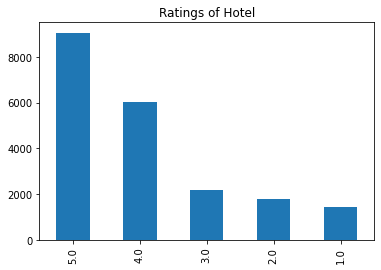

In [ ]:
# bar plot
import matplotlib.pyplot as plt
#bar plot
plt.Figure(figsize=(10,8))
plt.title("Ratings of Hotel")
t1=df["Rating"].value_counts()
t1
t1.plot(kind="bar")


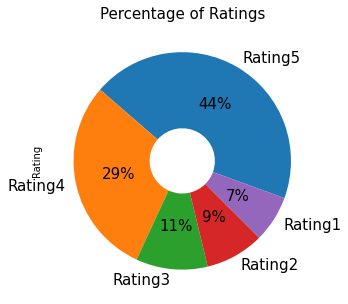

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Percentage of Ratings', fontsize=15)
df.Rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

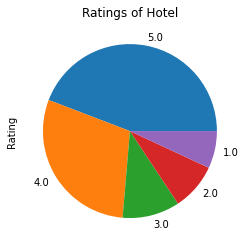

In [ ]:
#pie Chart
plt.title("Ratings of Hotel")
t1.plot(kind='pie')

In [ ]:
#Length of word in sentence
df['Length'] = df['Review'].apply(len)
df.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...     4.0     593
1  ok nothing special charge diamond member hilto...     2.0    1689
2  nice rooms not 4* experience hotel monaco seat...     3.0    1427
3  unique, great stay, wonderful time hotel monac...     5.0     600
4  great stay great stay, went seahawk game aweso...     5.0    1281

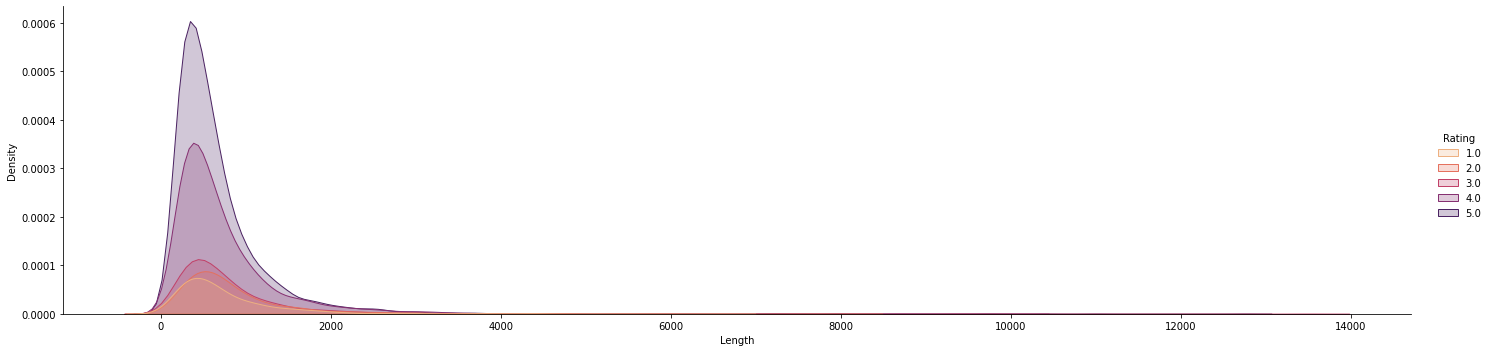

In [ ]:
sns.displot(data=df, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=4)

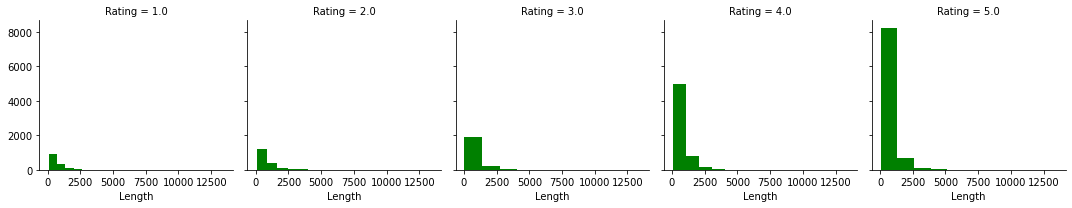

In [ ]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Length', color='green')#multi -axes grid with sub plot visualizing the distribution of variables of dataset and the relationship between multiple variables


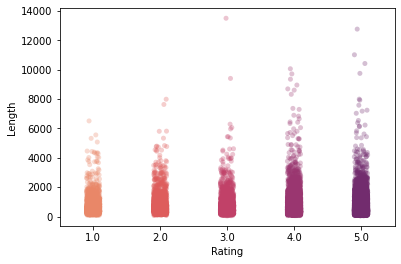

In [ ]:
sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)#single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values.

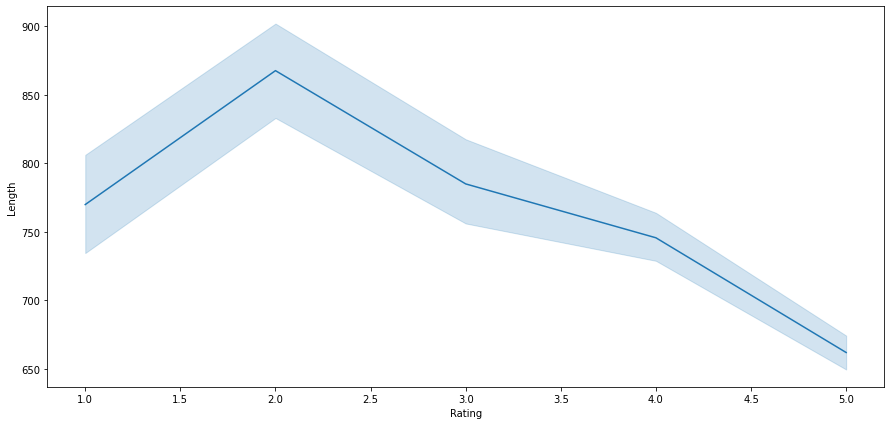

In [ ]:
# graph what the the relationship between Rating and Length

plt.figure(figsize=(15,7))
sns.lineplot(data=df,x="Rating", y="Length")

In [ ]:
import plotly.express as px
px.scatter(df,x="Rating",y="Length", color="Rating")

In [ ]:
from wordcloud import WordCloud

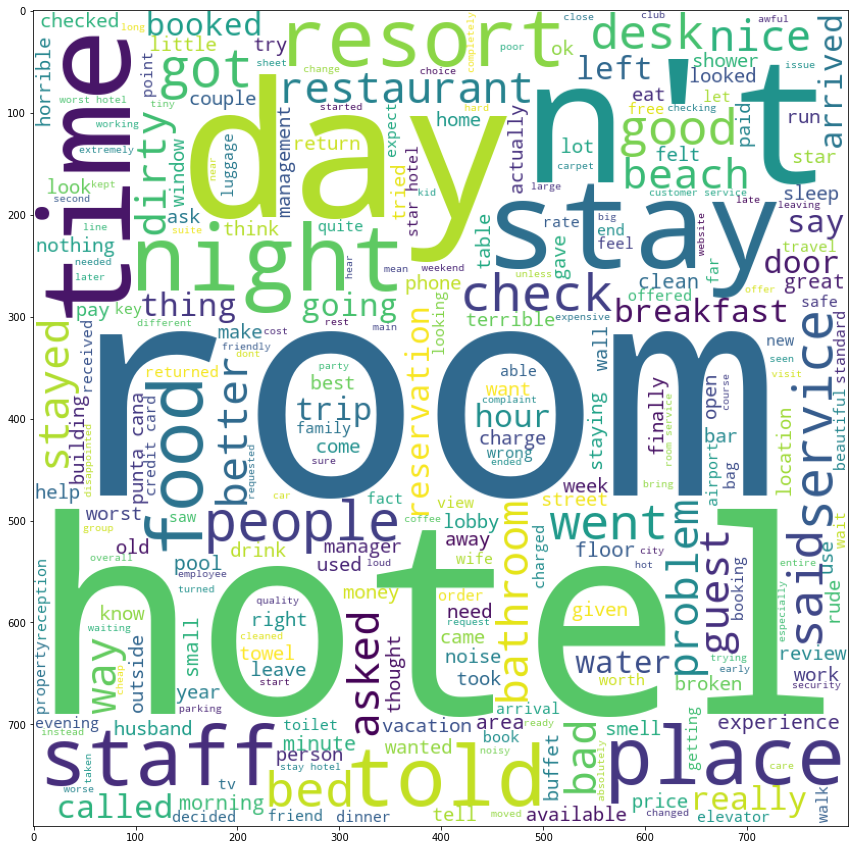

In [ ]:
#Rating 1
df_1=df[df["Rating"]==1]
df_1
# the highest work repeat in the review rating 1

plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc1)

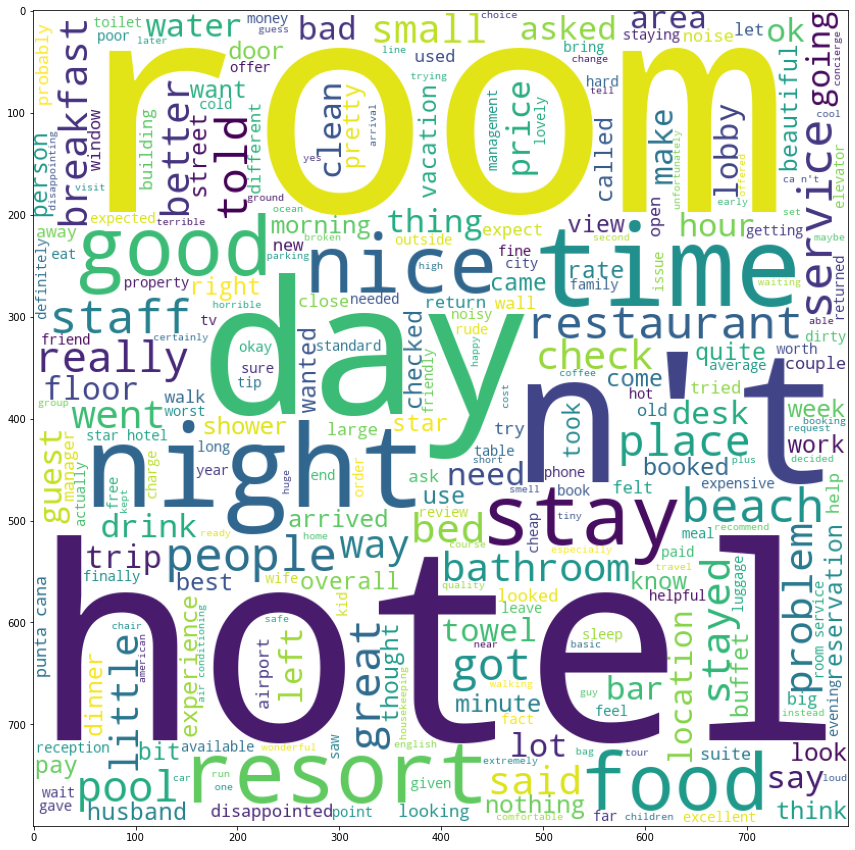

In [ ]:
#Rating 2
df_2=df[df["Rating"]==2]
df_2
# the highest work repeat in the review rating 2

plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_2['Review']))

plt.imshow(wc2)

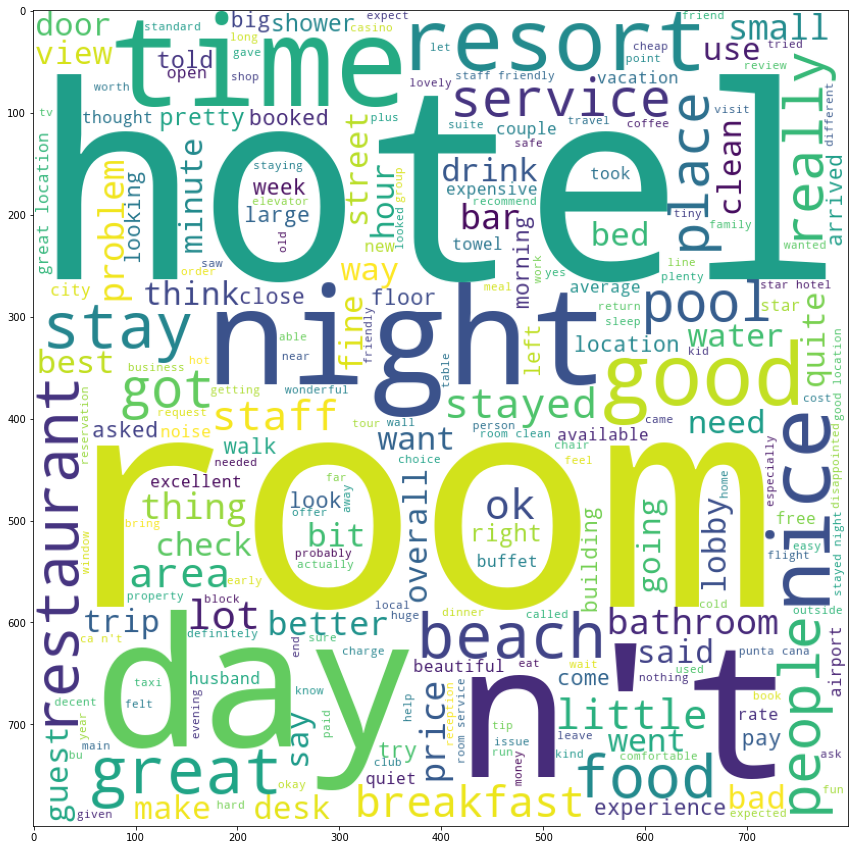

In [ ]:
#Rating 3
df_3=df[df["Rating"]==3]
df_3
# the highest work repeat in the review rating 3

plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_3['Review']))

plt.imshow(wc3)

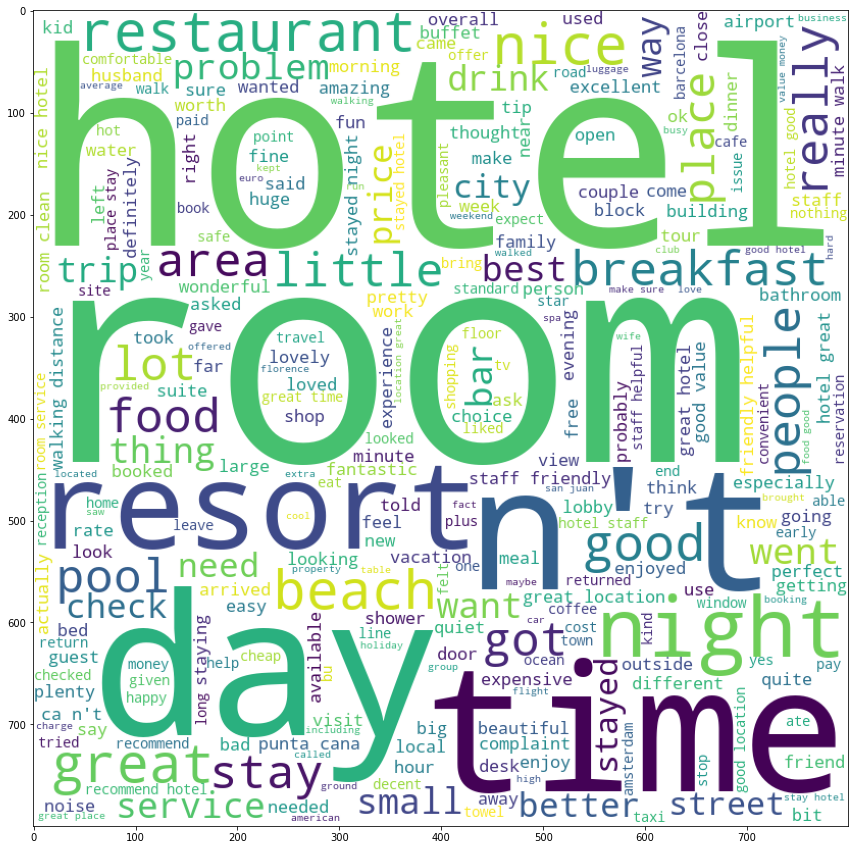

In [ ]:
#Rating 4
df_4=df[df["Rating"]==4]
df_4
# the highest work repeat in the review rating 4

plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review']))

plt.imshow(wc4)

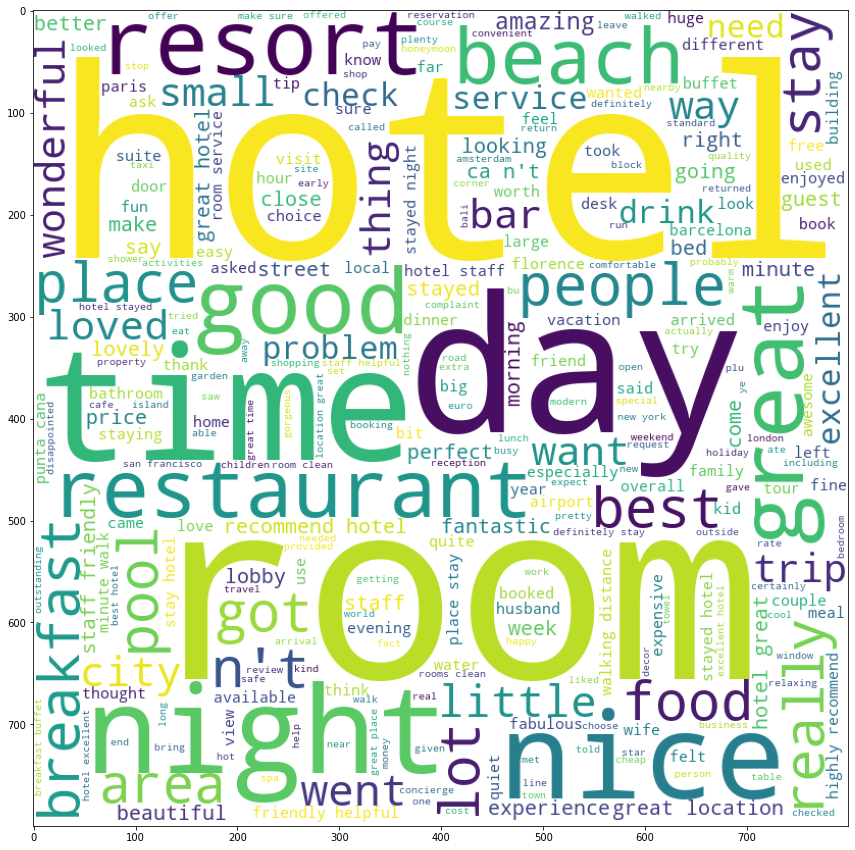

In [ ]:
#Rating 5
df_5=df[df["Rating"]==5]
df_5
# the highest work repeat in the review rating 5

plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc5)

In [ ]:
# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

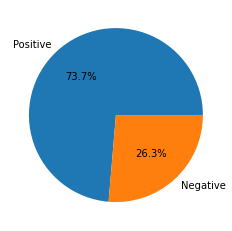

In [ ]:
df['Rating'] = df['Rating'].apply(ratings)
plt.pie(df['Rating'].value_counts(), labels=df['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

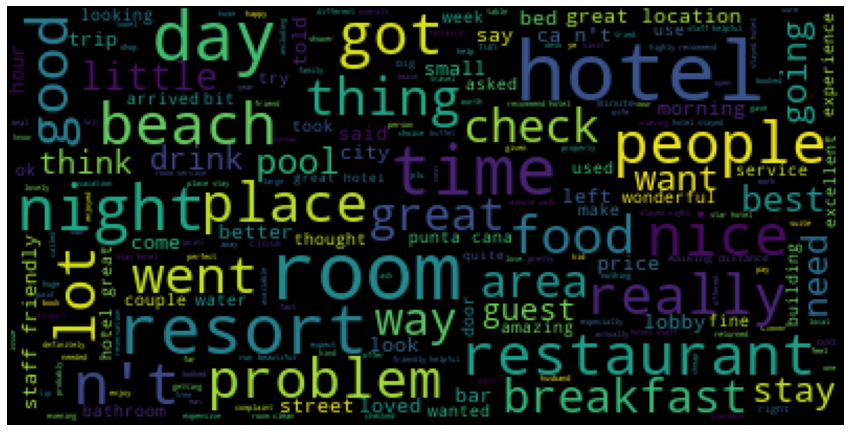

In [ ]:
show_wordcloud(df["Review"].values)  #Wordcloud for positive and negative  # for total reviews



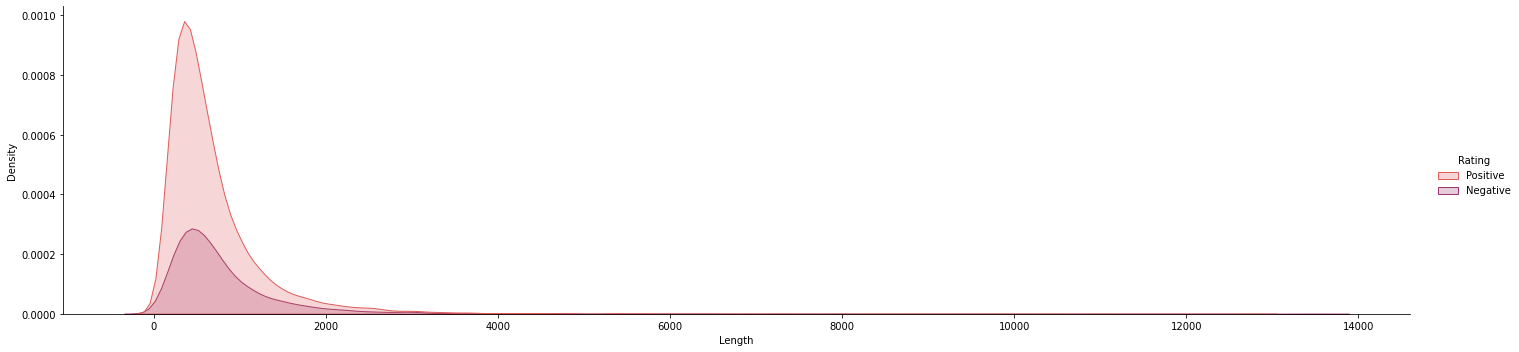

In [ ]:
sns.displot(data=df, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=4)

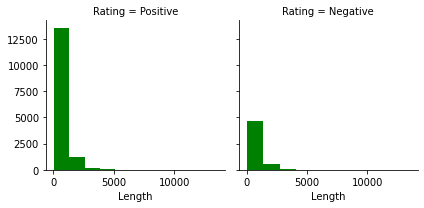

In [ ]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Length', color='green')

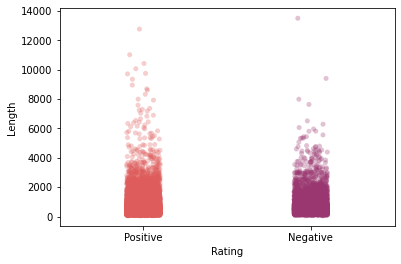

In [ ]:
sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)

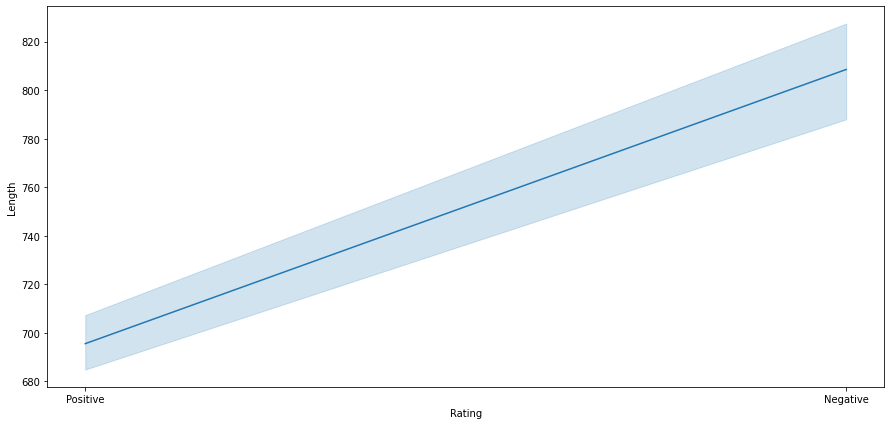

In [ ]:
 #graph what the the relationship between Rating and Length

plt.figure(figsize=(15,7))
sns.lineplot(data=df,x="Rating", y="Length")

In [ ]:
import plotly.express as px
px.scatter(df,x="Rating",y="Length", color="Rating")

In [ ]:
df['Length'] = df['Review'].str.len()
df.head(10)

Review    Rating  Length
0  nice hotel expensive parking got good deal sta...  Positive     593
1  ok nothing special charge diamond member hilto...  Negative    1689
2  nice rooms not 4* experience hotel monaco seat...  Negative    1427
3  unique, great stay, wonderful time hotel monac...  Positive     600
4  great stay great stay, went seahawk game aweso...  Positive    1281
5  love monaco staff husband stayed hotel crazy w...  Positive    1002
6  cozy stay rainy city, husband spent 7 nights m...  Positive     748
7  excellent staff, housekeeping quality hotel ch...  Positive     597
8  hotel stayed hotel monaco cruise, rooms genero...  Positive     419
9  excellent stayed hotel monaco past w/e delight...  Positive     271

In [ ]:
#Word count for review 1
word_count = df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}') #Number of words in a review

Word count in a sample review: 87


In [ ]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [ ]:
df['Word_count'] = df['Review'].apply(word_count)
df.head(10)

Review    Rating  Length  \
0  nice hotel expensive parking got good deal sta...  Positive     593   
1  ok nothing special charge diamond member hilto...  Negative    1689   
2  nice rooms not 4* experience hotel monaco seat...  Negative    1427   
3  unique, great stay, wonderful time hotel monac...  Positive     600   
4  great stay great stay, went seahawk game aweso...  Positive    1281   
5  love monaco staff husband stayed hotel crazy w...  Positive    1002   
6  cozy stay rainy city, husband spent 7 nights m...  Positive     748   
7  excellent staff, housekeeping quality hotel ch...  Positive     597   
8  hotel stayed hotel monaco cruise, rooms genero...  Positive     419   
9  excellent stayed hotel monaco past w/e delight...  Positive     271   

   Word_count  
0          87  
1         250  
2         217  
3          89  
4         191  
5         134  
6         101  
7          85  
8          59  
9          35

In [ ]:
import numpy as np

In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()])) #Average length of words
df.head(10)

Review    Rating  Length  \
0  nice hotel expensive parking got good deal sta...  Positive     593   
1  ok nothing special charge diamond member hilto...  Negative    1689   
2  nice rooms not 4* experience hotel monaco seat...  Negative    1427   
3  unique, great stay, wonderful time hotel monac...  Positive     600   
4  great stay great stay, went seahawk game aweso...  Positive    1281   
5  love monaco staff husband stayed hotel crazy w...  Positive    1002   
6  cozy stay rainy city, husband spent 7 nights m...  Positive     748   
7  excellent staff, housekeeping quality hotel ch...  Positive     597   
8  hotel stayed hotel monaco cruise, rooms genero...  Positive     419   
9  excellent stayed hotel monaco past w/e delight...  Positive     271   

   Word_count  mean_word_length  
0          87          5.804598  
1         250          5.752000  
2         217          5.571429  
3          89          5.730337  
4         191          5.701571  
5         134          6.470149  
6         101          6.396040  
7          85          6.011765  
8          59          6.084746  
9          35          6.714286

In [ ]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=df[col], hue=df['Rating'])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(df[col], hue=df['Rating'])
    plt.legend(df['Rating'].unique())
    plt.xlabel('')                             
    plt.ylabel('')
    
    plt.show()

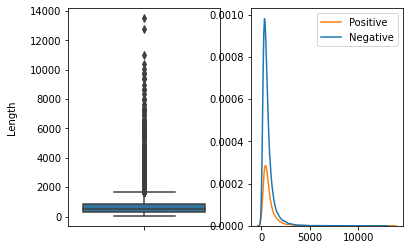

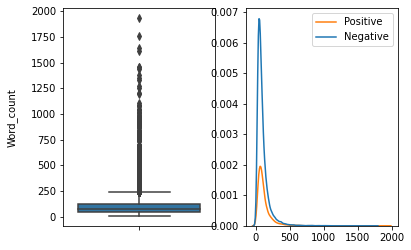

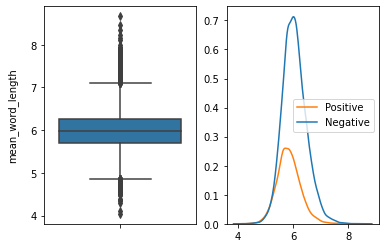

In [ ]:
features = df.columns.tolist()[2:]
for feature in features:
    visualize(feature)

In [ ]:
df = df.drop(features, axis=1)
df.head()

Review    Rating
0  nice hotel expensive parking got good deal sta...  Positive
1  ok nothing special charge diamond member hilto...  Negative
2  nice rooms not 4* experience hotel monaco seat...  Negative
3  unique, great stay, wonderful time hotel monac...  Positive
4  great stay great stay, went seahawk game aweso...  Positive

In [ ]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['Review'] = df['Review'].apply(clean)
df.head(10)

Review    Rating
0  nice hotel expensive parking got good deal sta...  Positive
1  ok nothing special charge diamond member hilto...  Negative
2  nice rooms 4 experience hotel monaco seattle g...  Negative
3  unique great stay wonderful time hotel monaco ...  Positive
4  great stay great stay went seahawk game awesom...  Positive
5  love monaco staff husband stayed hotel crazy w...  Positive
6  cozy stay rainy city husband spent 7 nights mo...  Positive
7  excellent staff housekeeping quality hotel cho...  Positive
8  hotel stayed hotel monaco cruise rooms generou...  Positive
9  excellent stayed hotel monaco past delight rec...  Positive

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list
df['Review_lists'] = df['Review'].apply(corpus)
df.head(10)

Review    Rating  \
0  nice hotel expensive parking got good deal sta...  Positive   
1  ok nothing special charge diamond member hilto...  Negative   
2  nice rooms 4 experience hotel monaco seattle g...  Negative   
3  unique great stay wonderful time hotel monaco ...  Positive   
4  great stay great stay went seahawk game awesom...  Positive   
5  love monaco staff husband stayed hotel crazy w...  Positive   
6  cozy stay rainy city husband spent 7 nights mo...  Positive   
7  excellent staff housekeeping quality hotel cho...  Positive   
8  hotel stayed hotel monaco cruise rooms generou...  Positive   
9  excellent stayed hotel monaco past delight rec...  Positive   

                                        Review_lists  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, 4, experience, hotel, monaco, se...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...  
5  [love, monaco, staff, husband, stayed, hotel, ...  
6  [cozy, stay, rainy, city, husband, spent, 7, n...  
7  [excellent, staff, housekeeping, quality, hote...  
8  [hotel, stayed, hotel, monaco, cruise, rooms, ...  
9  [excellent, stayed, hotel, monaco, past, delig...

In [ ]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]     #collection of authentic text or audio organized into datasets.
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 115773.17it/s]


2061021

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 48844),
 ('room', 34278),
 ('great', 21068),
 ('nt', 18989),
 ('good', 16953),
 ('staff', 16193),
 ('stay', 15142),
 ('nice', 12393),
 ('rooms', 12004),
 ('location', 11009)]

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

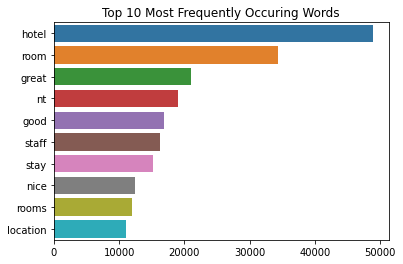

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

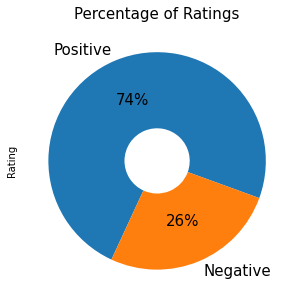

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Percentage of Ratings', fontsize=15)
df.Rating.value_counts().plot(kind='pie', labels=['Positive', 'Negative'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})